In [1]:
#Elethu !!!!!
from google.colab import drive
import pandas as pd
import numpy as np
import hashlib
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# File path to your CSV file on Google Drive
file_path = '/content/drive/Shareddrives/FNB Dataquest/Dataset/dq_recsys_challenge_2025(in).csv'

# Read the CSV file with correct encoding
original_data = pd.read_csv(file_path, encoding='ISO-8859-1')

print("\nMissing values per column:")
print(original_data.isnull().sum())

# Create a copy of original_data to cleaned_data for cleaning
cleaned_data = original_data.copy()

# Fill missing descriptions with 'unknown'
cleaned_data['item_descrip'] = cleaned_data['item_descrip'].fillna('unknown')

# Replace empty strings or strings with only whitespace in 'item_descrip' with NaN
#cleaned_data['item_descrip'] = cleaned_data['item_descrip'].replace(r'^\s*$', np.nan, regex=True)

#Remove duplicate rows
cleaned_data = cleaned_data.drop_duplicates()

# Standardize ['item_descrip'] text (strip spaces and lowercase)
cleaned_data['item_descrip']= cleaned_data['item_descrip'].str.strip().str.lower()

#Standardize 'interaction' column
cleaned_data['interaction'] = cleaned_data['interaction'].str.strip().str.upper()
print("\nCleaned data sample:")
cleaned_data.head()




Mounted at /content/drive

Missing values per column:
idcol                0
interaction          0
int_date             0
item                 0
page                 0
tod                  0
item_type            0
item_descrip    173638
segment              0
beh_segment          0
active_ind           0
dtype: int64

Cleaned data sample:


<ipython-input-1-51af909cafbc>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['item_descrip']= cleaned_data['item_descrip'].str.strip().str.lower()


,idcol,interaction,int_date,item,page,tod,item_type,item_descrip,segment,beh_segment,active_ind
0,755,DISPLAY,17-Jan-23,NONE,Screen1,Afternoon,ALL,unknown,segment3,B01,Semi Active
1,4521,DISPLAY,27-Feb-23,NONE,Screen1,Afternoon,ALL,unknown,segment1,B07,Semi Active
2,4521,DISPLAY,18-Feb-23,NONE,Screen1,Afternoon,ALL,unknown,segment1,B07,Semi Active
3,4521,DISPLAY,30-Jan-23,NONE,Screen1,Morning,ALL,unknown,segment1,B07,Semi Active
4,4521,CLICK,5-Feb-23,IBAB,Screen1,Afternoon,INSURE,generic message,segment1,B07,Semi Active


<ipython-input-3-bf9960567dad>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interaction_counts.index, y=interaction_counts.values, palette='Set2')


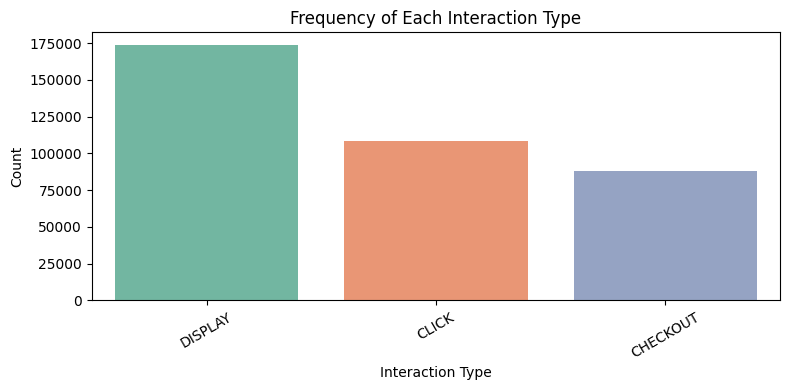

<ipython-input-3-bf9960567dad>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tod_counts.index, y=tod_counts.values, palette='coolwarm')


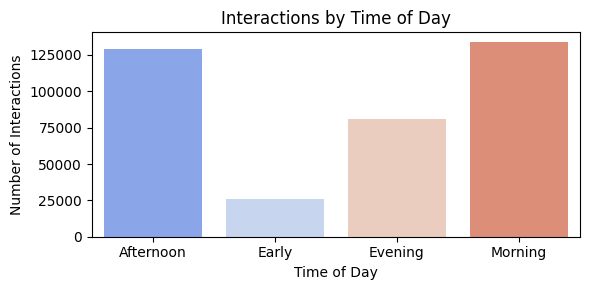

<ipython-input-3-bf9960567dad>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x='page', order=sorted(cleaned_data['page'].unique()), palette='viridis')


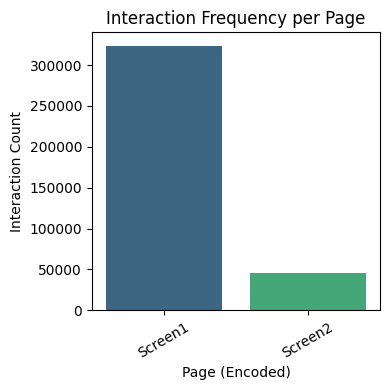

Most used items:
 item_type
ALL          173611
INSURE        54946
LEND          47642
LIFESTYLE     35084
CONNECT       22463
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


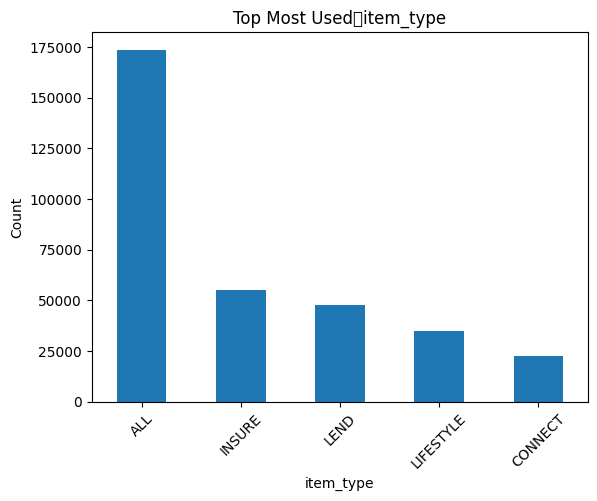


 Most Common item_descrips:
item_descrip
unknown                 173611
dda temp loans batch     22189
generic message          15533
pls new loan              6029
dda upgrade               5806
Name: count, dtype: int64

 Least Common item_descrips:
item_descrip
new will review              37
32 day flexinotice           19
money maximiser              13
invstmt schedule transfer     9
7 day deposit                 4
Name: count, dtype: int64
 Summary Statistics for ID and Page columns:

              idcol           page
count  3.696830e+05  369683.000000
mean   3.365170e+09       0.123982
std    8.138075e+09       0.329561
min    7.550000e+02       0.000000
25%    4.434193e+07       0.000000
50%    1.134047e+08       0.000000
75%    3.197394e+08       0.000000
max    2.572863e+10       1.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torch.utils.data import Dataset

# ELETHU

# Frequency of each interaction type
plt.figure(figsize=(8, 4))
interaction_counts = cleaned_data['interaction'].value_counts()
sns.barplot(x=interaction_counts.index, y=interaction_counts.values, palette='Set2')
plt.title('Frequency of Each Interaction Type')
plt.xlabel('Interaction Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Peak activity by time of day (tod)
plt.figure(figsize=(6, 3))
tod_counts = cleaned_data['tod'].value_counts().sort_index()
sns.barplot(x=tod_counts.index, y=tod_counts.values, palette='coolwarm')
plt.title('Interactions by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Interactions')
plt.tight_layout()
plt.show()

# Interaction frequency per page
plt.figure(figsize=(4, 4))
sns.countplot(data=cleaned_data, x='page', order=sorted(cleaned_data['page'].unique()), palette='viridis')
plt.title('Interaction Frequency per Page')
plt.xlabel('Page (Encoded)')
plt.ylabel('Interaction Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# Count the occurrences of each 	item_type
item_counts = cleaned_data['item_type'].value_counts()

# Show the most common item_type
print("Most used items:\n", item_counts.head())

# Plot the top  most used item_type
item_counts.head().plot(kind='bar')
plt.xlabel('item_type')
plt.ylabel('Count')
plt.title(f'Top Most Used	item_type')
plt.xticks(rotation=45)
plt.show()




# Most used item descriptions
print("\n Most Common item_descrips:")
print(cleaned_data['item_descrip'].value_counts().head(5))

# Least used item descriptions
print("\n Least Common item_descrips:")
print(cleaned_data['item_descrip'].value_counts().tail(5))


#  Map 'page' column to numeric values
page_mapping = {page: idx for idx, page in enumerate(cleaned_data['page'].unique())}
cleaned_data['page'] = cleaned_data['page'].map(page_mapping)

# Summary statistics for 'idcol' and mapped 'page'
print(" Summary Statistics for ID and Page columns:\n")
numeric_cols = ['idcol', 'page']  # Ensure these are valid numeric columns
print(cleaned_data[numeric_cols].describe())


In [ ]:
#Hope

def generate_user_features(cleaned_data):
    # Group by user ID and count how many times each user appears
    User_interactions = (
        cleaned_data.groupby('idcol')
        .size()
        .reset_index(name='total_interactions')
    )

    # Get most frequent segment per user
    user_segment = (
        cleaned_data.groupby('idcol')['segment']
        .apply(lambda x: x.mode().iloc[0])
        .reset_index()
        .rename(columns = {'segment': 'user_segment'})
    )

    # Get most frequent behavioral segment per user
    user_beh_segment = (
        cleaned_data.groupby('idcol')['beh_segment']
        .apply(lambda x: x.mode().iloc[0])
        .reset_index()
        .rename(columns = {'beh_segment': 'user_beh_segment'})
    )

    #Group by user and get the most common activity level
    user_engagement = (
        cleaned_data.groupby('idcol')['active_ind']
        .apply(lambda x: x.mode().iloc[0])
        .reset_index()
        .rename(columns = {'active_ind': 'engagement_level'})
    )

    #Most frequent page interaction per user
    user_top_page = (
        cleaned_data.groupby(['idcol','page'])
        .size()
        .reset_index(name = 'page_count')
        .sort_values(['idcol', 'page_count'], ascending = [True, False])
        .drop_duplicates(subset = 'idcol', keep = 'first')
        .rename(columns = {'page': 'common_interaction_page'})
        .drop(columns = 'page_count')
    )

    #Merge all the results
    final_result  = (
        User_interactions
        .merge(user_segment, on = 'idcol')
        .merge(user_beh_segment, on = 'idcol')
        .merge(user_engagement, on = 'idcol')
        .merge(user_top_page, on = 'idcol')
    )

    return final_result

final_result  = generate_user_features (cleaned_data)
final_result .head()


,idcol,total_interactions,user_segment,user_beh_segment,engagement_level,common_interaction_page
0,755,1,segment3,B01,Semi Active,0
1,4521,5,segment1,B07,Semi Active,0
2,6145,4,segment3,B01,Cold Start,0
3,7125,1,segment3,B01,Cold Start,0
4,8469,3,segment1,B01,Semi Active,0


In [ ]:
#Elethu!!!
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def encode_user_features(user_features):
    user_features = user_features.copy()

    # One-Hot Encoding for categorical features
    categorical_cols = ['user_segment', 'user_beh_segment', 'engagement_level']
    encoded_cols = pd.get_dummies(user_features[categorical_cols], dtype=float)

    # Standard Scaling for numerical features
    numeric_cols = ['total_interactions']
    scaler = StandardScaler()
    user_features[numeric_cols] = scaler.fit_transform(user_features[numeric_cols])

    # Drop original categorical columns
    user_features = user_features.drop(columns=categorical_cols)

    # Merge encoded features
    return pd.concat([user_features[numeric_cols], encoded_cols], axis=1)

# Apply encoding function
user_features = generate_user_features(cleaned_data)
final_encoded_result = encode_user_features(final_result)

# Display the encoded user feature dataset
final_encoded_result.head()

,total_interactions,user_segment_segment1,user_segment_segment2,user_segment_segment3,user_segment_segment4,user_beh_segment_B01,user_beh_segment_B02,user_beh_segment_B03,user_beh_segment_B04,user_beh_segment_B05,...,user_beh_segment_B44,user_beh_segment_B45,user_beh_segment_B46,user_beh_segment_B47,user_beh_segment_B48,user_beh_segment_B49,user_beh_segment_B50,engagement_level_Active,engagement_level_Cold Start,engagement_level_Semi Active
0,-0.704734,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.128919,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.079495,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.704734,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.287908,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Hope

def generate_item_features(cleaned_data):
      #Total_interaction per item
      total_interactions_per_item = cleaned_data.groupby('item').size().rename('total_interactions')

      #Interactions type counts
      interaction_counts = cleaned_data.pivot_table(
          index='item',
          columns='interaction',
          values='idcol',
          aggfunc='count',
          fill_value=0
      )

      # Ensure CLICK and CHECKOUT columns exist even if they're missing in some items
      interaction_counts['CLICK'] = interaction_counts.get('CLICK', pd.Series(0, index=interaction_counts.index))
      interaction_counts['CHECKOUT'] = interaction_counts.get('CHECKOUT', pd.Series(0, index=interaction_counts.index))

      #Convension rate = checkout/CLICK
      conversion_click_rate = (interaction_counts['CHECKOUT'] /
                              interaction_counts['CLICK'].replace(0, 1)).rename('conversion_click_rate')

      item_types = cleaned_data[['item', 'item_type']].drop_duplicates().set_index('item')

      item_features = pd.concat([total_interactions_per_item,
                                interaction_counts[['CLICK', 'CHECKOUT']],
                                conversion_click_rate,
                                item_types
                                ], axis=1).reset_index()

      return item_features

item_features = generate_item_features(cleaned_data)
item_features.head()


,item,total_interactions,CLICK,CHECKOUT,conversion_click_rate,item_type
0,CABC,2401,1165,1236,1.060944,INVEST
1,CACU,5806,2931,2875,0.980894,TRANSACT
2,CAFB,249,164,85,0.518293,TRANSACT
3,CAFI,1153,631,522,0.827258,LEND
4,CAFM,2131,1225,906,0.739592,TRANSACT


In [ ]:
#Elethu!!!
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def encode_item_features(item_features):
    item_features = item_features.copy()

    # One-Hot Encoding for categorical features
    categorical_cols = ['item_type', "item"]
    encoded_cols = pd.get_dummies(item_features[categorical_cols], dtype=float)

    # Standard Scaling for numerical features
    numeric_cols = ['total_interactions', 'CLICK', 'CHECKOUT', 'conversion_click_rate']
    scaler = StandardScaler()
    item_features[numeric_cols] = scaler.fit_transform(item_features[numeric_cols])

    # Drop original categorical columns
    item_features = item_features.drop(columns=categorical_cols)
    item_features.head()

    # Merge encoded features
    return pd.concat([item_features[ numeric_cols], encoded_cols], axis=1)

# Apply encoding function to item features
item_features = generate_item_features(cleaned_data)
final_encoded_item_features = encode_item_features(item_features)

# Display the encoded item feature dataset
final_encoded_item_features.head()

,total_interactions,CLICK,CHECKOUT,conversion_click_rate,item_type_ALL,item_type_CONNECT,item_type_INSURE,item_type_INVEST,item_type_LEND,item_type_LIFESTYLE,...,item_MMMC,item_MMSM,item_NACS,item_NAFW,item_NASD,item_NATR,item_NONE,item_SEVP,item_WHCR,item_XCFL
0,-0.068012,0.090254,0.299932,0.867625,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.132727,1.373549,1.555615,0.560267,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.194881,-0.637141,-0.581881,-1.215914,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.141587,-0.297787,-0.247084,-0.029624,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.083930,0.133854,0.047109,-0.366224,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Elethu!!!
import pandas as pd

# Ensure date is in datetime format
cleaned_data['int_date'] = pd.to_datetime(cleaned_data['int_date'])

# Sort by date to maintain chronological order
cleaned_data = cleaned_data.sort_values('int_date').reset_index(drop=True)

# Define split ratios (60% train, 20% val, 20% test)
n_total = len(cleaned_data)
train_end = int(n_total * 0.6)
val_end = int(n_total * 0.8)

# Create splits
train_data = cleaned_data.iloc[:train_end]
val_data = cleaned_data.iloc[train_end:val_end]
test_data = cleaned_data.iloc[val_end:]

# Confirm the split
print("Train range:", train_data['int_date'].min(), "to", train_data['int_date'].max())
print("Val range:  ", val_data['int_date'].min(), "to", val_data['int_date'].max())
print("Test range: ", test_data['int_date'].min(), "to", test_data['int_date'].max())

print(f"\nSizes — Train: {len(train_data)}, Val: {len(val_data)}, Test: {len(test_data)}")


<ipython-input-9-0542fde30738>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned_data['int_date'] = pd.to_datetime(cleaned_data['int_date'])


Train range: 2023-01-01 00:00:00 to 2023-02-23 00:00:00
Val range:   2023-02-23 00:00:00 to 2023-03-13 00:00:00
Test range:  2023-03-13 00:00:00 to 2023-03-31 00:00:00

Sizes — Train: 221809, Val: 73937, Test: 73937


In [2]:
!pip install lightfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp311-cp311-linux_x86_64.whl size=831160 sha256=eac3aed412a7c08196cbf4f40ffd6107268b6fe3332207c1c1fc106ea25ebf26
  Stored in directory: /root/.cache/pip/wheels/b9/0d/8a/0729d2e6e3ca2a898ba55201f905da7db3f838a33df5b3fcdd
Successfully built lightfm


In [4]:
#Siyabonga
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import recall_at_k

# Create user and item ID mappings (categorical to integer)
customer_ids = cleaned_data['idcol'].astype('category')
item_ids = cleaned_data['item'].astype('category')

cleaned_data['customer_idx'] = customer_ids.cat.codes
cleaned_data['item_idx'] = item_ids.cat.codes

num_users = cleaned_data['customer_idx'].max() + 1
num_items = cleaned_data['item_idx'].max() + 1


# Ensure date is in datetime format
cleaned_data['int_date'] = pd.to_datetime(cleaned_data['int_date'])

# Sort by date to maintain chronological order
cleaned_data = cleaned_data.sort_values('int_date').reset_index(drop=True)

# Define split ratios (60% train, 20% val, 20% test)
n_total = len(cleaned_data)
train_end = int(n_total * 0.6)
val_end = int(n_total * 0.8)

# Create splits
train_data = cleaned_data.iloc[:train_end]
val_data = cleaned_data.iloc[train_end:val_end]
test_data = cleaned_data.iloc[val_end:]
def interaction_maker(interaction_df, y=num_users, x=num_items):
    interaction_df = interaction_df.loc[interaction_df['interaction'].isin(['CLICK', 'CHECKOUT'])].copy()
    interaction_weights = {'CLICK': 1, 'CHECKOUT': 2}
    interaction_df['rating'] = interaction_df['interaction'].map(interaction_weights)
    interactions_matrix = csr_matrix((interaction_df['rating'], (interaction_df['customer_idx'], interaction_df['item_idx'])),shape=(y, x))
    return interactions_matrix

train_interactions = interaction_maker(train_data)
test_interactions = interaction_maker(test_data)
val_interactions = interaction_maker(val_data)

model = LightFM(loss='warp')
model.fit(train_interactions, epochs=40, num_threads=4)

print("Train Precision@5:", precision_at_k(model, train_interactions, k=5).mean())
print("Test Precision@5:", precision_at_k(model, test_interactions, k=5).mean())
print("Val Precision@5:", precision_at_k(model, val_interactions, k=5).mean())
print("Train Recall@5:", recall_at_k(model, train_interactions, k=5).mean())
print("Test Recall@5:", recall_at_k(model, test_interactions, k=5).mean())
print("Val Recall@5:", recall_at_k(model, val_interactions, k=5).mean())

Train Precision@5: 0.32093418
Test Precision@5: 0.0721194
Val Precision@5: 0.080740005
Train Recall@5: 0.941784074362656
Test Recall@5: 0.2558548029821662
Val Recall@5: 0.2838108448465237
